# Lending Club Case Study

### Importing required modules

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [41]:
loan_data = pd.read_csv(r"C:\Users\DELL\Downloads\loan.csv")

### Understanding the Data

In [42]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [43]:
loan_data.shape

(39717, 111)

In [44]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [45]:
loan_data.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

OBSERVATION:We can observe there are a lot of coloumns with NaN values. 

In [46]:
loan_data.isnull().sum() * 100 / len(loan_data)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

OBSERVATION: We can see there are a lot of coloumns with 100% null values. These can be dropped for our analysis.

In [47]:
print(loan_data.nunique(axis=0))

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


OBSERVATION: There are many coloumns with 1 uniques value. These can also be dropped as they are not useful for our analysis.

### Data Cleaning

In [48]:
#Removing coloumns with 100% null values
loan_data = loan_data.dropna(axis=1, how='all')

In [49]:
loan_data.shape

(39717, 57)

In [50]:
#Removing coloumns with more than 30% null values
loan_data = loan_data.dropna(thresh=loan_data.shape[0]*0.7,axis=1)

In [51]:
loan_data.shape

(39717, 53)

In [52]:
#checking for unique values
print(loan_data.nunique(axis=0))

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [53]:
#Dropping coloumns having only one unique value.
drop_cols = [c for c in list(loan_data) if loan_data[c].nunique() <= 1]
loan_data = loan_data.drop(columns=drop_cols)

In [54]:
loan_data.shape

(39717, 44)

In [55]:
#checking the datatypes of coloumns
loan_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [56]:
loan_data['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

### Determining which coloumns are not required for our analysis

1. id = This is a unique LC assigned ID for the loan listing. This doest not have any any impact on our analysis.
2. member_id = A unique LC assigned Id for the borrower member. This too does not have any impact on our analysis.
3. emp_title = There are a lot of unique values (about 28820) and cannot be generalized for our analysis.
4. issue_d = The month which the loan was funded is also not useful for our analysis.
5. url = URL for the LC page with listing data. This is also not a useful metric
6. title = The loan title provided by the borrower. Purpose of loan is better metrics than the title provided by user.
7. zip_code = The first 3 numbers of the zip code provided by the borrower in the loan application. Also not a useful metrics.
8. arliest_cr_line: The month the borrower's earliest reported credit line was opened. This information might not directly impact the likelihood of default.
9. nq_last_6mths: The number of inquiries in the past 6 months. It might not be a strong predictor of loan default.
10. open_acc: The number of open credit lines. This might not be a strong predictor of default risk.
11. revol_bal: Total credit revolving balance. 
12. revol_util: Revolving line utilization rate.
13. total_acc: The total number of credit lines. 
14. out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee: These columns provide information about the loan payment history. these are not useful for predicting  default at the time of application.
15. recoveries, collection_recovery_fee: These columns provide information about post-charge-off recovery, which may not directly impact the initial loan approval decision.
16. last_pymnt_d, last_pymnt_amnt, last_credit_pull_d: These columns provide information about the last payment and credit pull, which might be more relevant for post-approval monitoring.

In [57]:
unwanted_cols = ['id','member_id','title','emp_title','url','zip_code','earliest_cr_line','inq_last_6mths','open_acc','revol_bal','revol_util','total_acc','out_prncp',
              'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
              'last_credit_pull_d']


In [58]:
loan_data = loan_data.drop(unwanted_cols, axis =1)

In [59]:
loan_data.shape

(39717, 20)

Dropping records which has "Current" as loan status as these are not useful for the analysis.

In [60]:
loan_data = loan_data[loan_data['loan_status'] != "Current"]

In [61]:
loan_data.shape

(38577, 20)

In [62]:
# Dropping NONE records from home_ownership.
loan_data = loan_data[loan_data['home_ownership'] != 'NONE']
loan_data.shape

(38574, 20)

In [63]:
# Dropping missing records from emp_length.
loan_data = loan_data[~loan_data['emp_length'].isnull()]
loan_data.shape

(37541, 20)

In [64]:
# Dropping missing records from pub_rec_bankruptcies.
loan_data = loan_data[~loan_data['pub_rec_bankruptcies'].isnull()]
loan_data.shape

(36847, 20)

### Preprocessing Data

In [65]:
#Converting interest rate to float
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0,0.0


In [66]:
#Replacing 10+ years with 10 years and < 1 year with 0 year in emp_length 
loan_data['emp_length'] = loan_data['emp_length'].replace({'10+ years': '10 years', '< 1 year': '0 years'})
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10 years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0 years,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10 years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10 years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0,0.0


In [67]:
#Checking for missing values
loan_data.isnull().sum() * 100 / len(loan_data)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Data Analysis

### Univariate Analysis

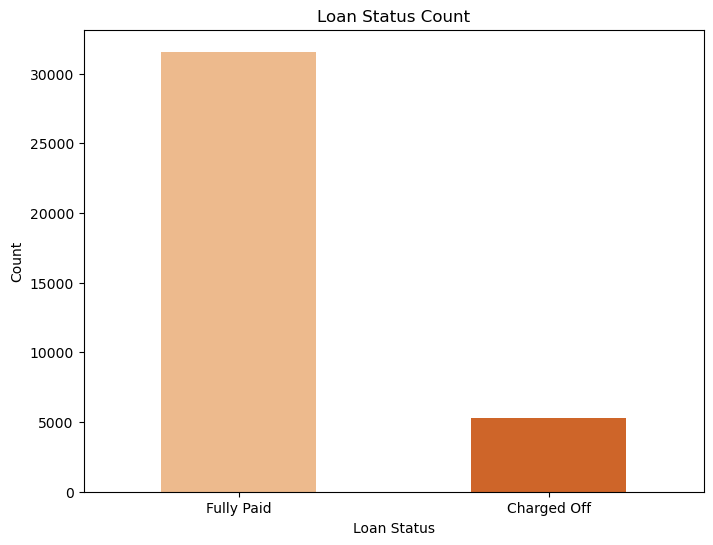

In [79]:
#Visualizing the count of Charged off and Fully Paid
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=loan_data, palette='Oranges',width=0.5)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [82]:
status_counts = loan_data['loan_status'].value_counts()
print(status_counts['Charged Off'] / len(loan_data)* 100)

14.332238716856189


OBSERVATION : About 14.33% loans were charged off.

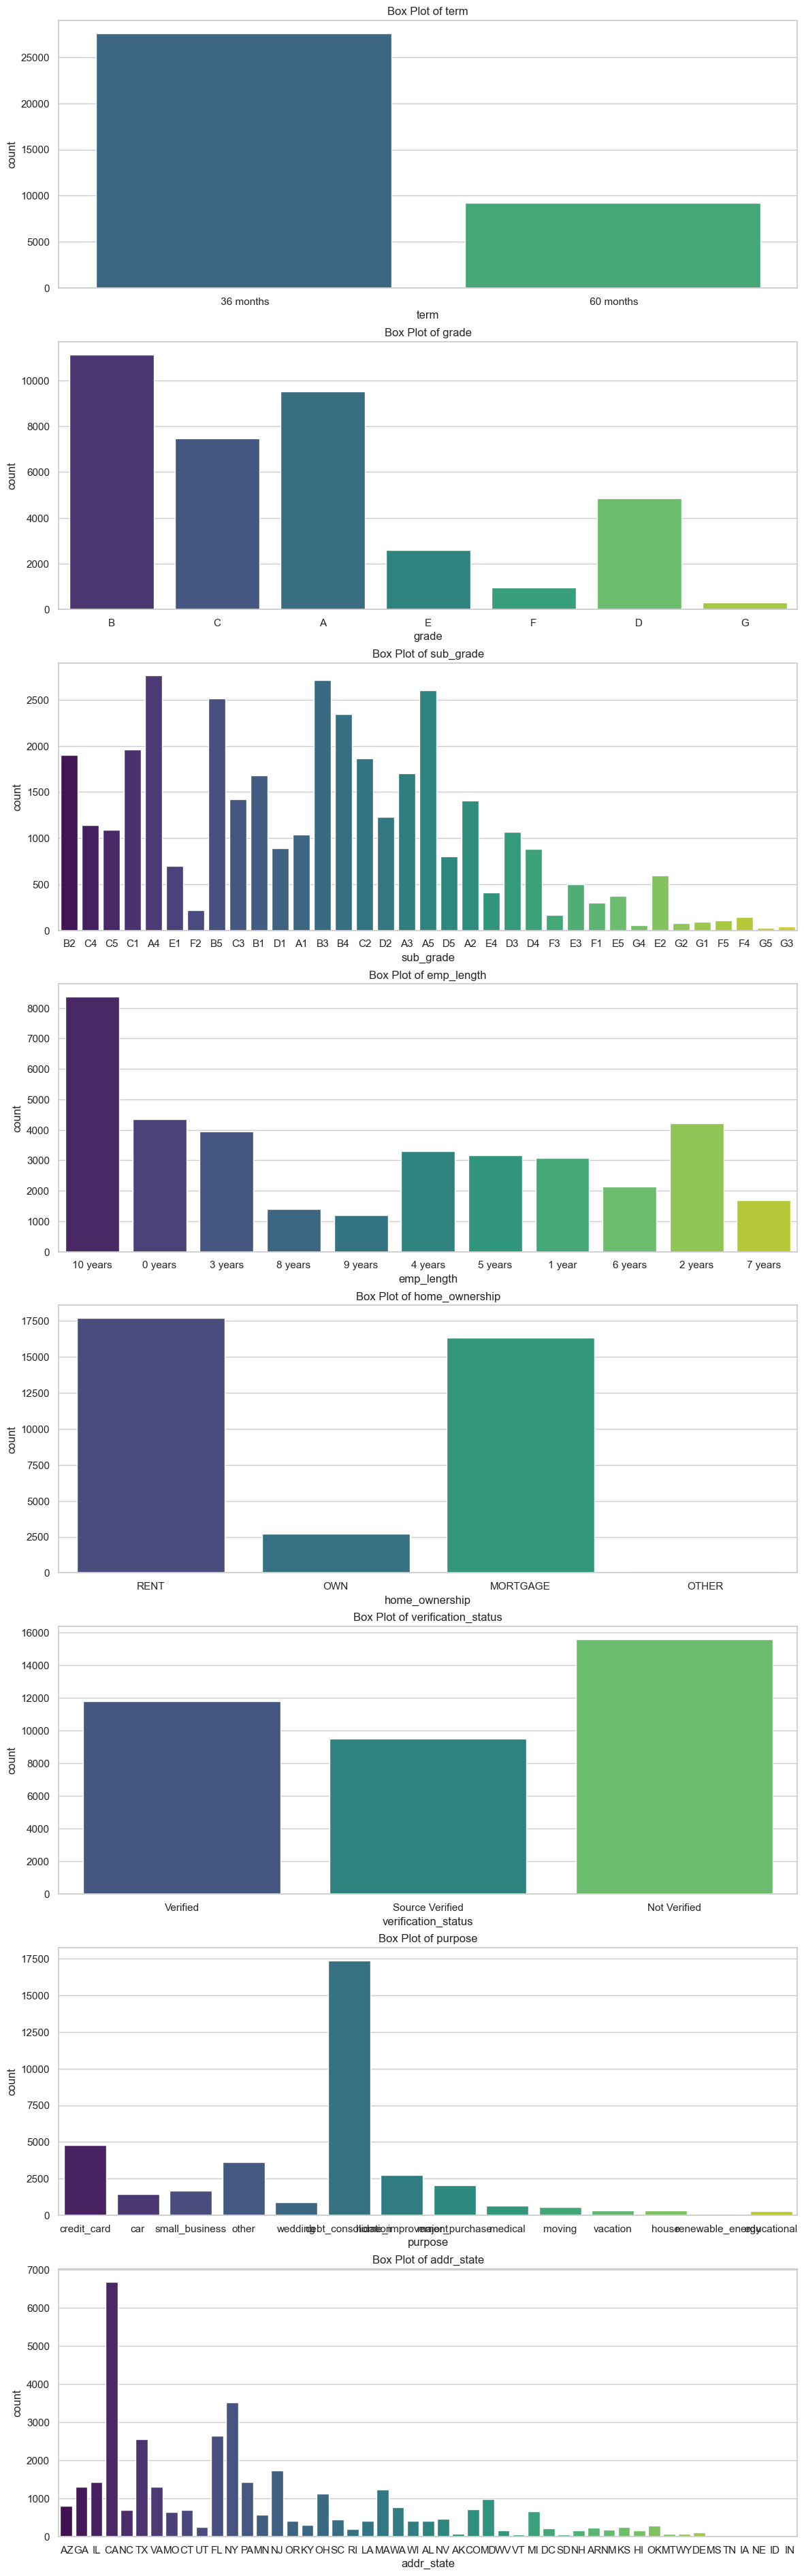

In [99]:
sns.set(style="whitegrid")

categorical_vars = ['term', 'grade', 'sub_grade','emp_length','home_ownership','verification_status', 'purpose','addr_state']


fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(14, 6 * len(categorical_vars)))


for i, cat_var in enumerate(categorical_vars):
    sns.countplot(x=cat_var, data=loan_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Box Plot of {cat_var}')



plt.show()




OBSERVATIONS:
1. most of the loans are taken for 36 months.
2. most number of loans are taken in Grade B and least in Grade G
3. most loans are taken by people with employment length greater tha or equal to 10 years.
4. people living on rent are taking most loans.
5. Most of the loans have status Not verified.
6. debt_consolidation is major reason for taking loans.
7. People of California have taken most loans.